## Quadratic Logistic Model, d-optimal

In [1]:
using PyPlot
using LinearAlgebra

# projection function onto the design space
function proj(x, design)
    n = Int((length(x)+1)/2)
    a = x[1:n]
    b = x[(n+1):(2*n-1)]
    b = [b; 1-sum(b)]
    
    a = max.(a,design[1])
    a = min.(a,design[2])
    
    u = sort(b, rev=true)
    j = n
    while true
        if u[j] + 1/j*(1-cumsum(u)[j]) > 0
            break
        end
        j -= 1
    end
    lambda = 1/j*(1-cumsum(u)[j])
    b = max.(b .+ lambda,0)
    b = b[1:(n-1)]
    
    return [a;b]
end

proj (generic function with 1 method)

In [2]:
#Information matrix for quadratic logistic model
function infmat(x)
    n = Int((length(x)+1)/2)
    a = x[1:n]
    b = x[(n+1):(2*n-1)]
    b = [b; 1-sum(b)]
    p = length(theta)
    mat = zeros(p,p)
    for i in 1:n
        c = 1-exp(-30*exp(theta[1]+theta[2]*a[i]))
        f = [1,a[i]]
        mat = mat + b[i] * c * f*f'
    end
    return mat
end

infmat (generic function with 1 method)

In [3]:
function diter()
    #initialize
    #srand(1992)
    path = zeros(niter)
    tau = 0.9:(-0.5/niter):0.4
    v = zeros(nptc, 2k-1)
    x = (design[2]-design[1])*rand(nptc*k) .+ design[1]
    x = reshape(x,nptc,k)
    w = rand(nptc*(k-1))
    w = reshape(w,nptc,k-1)
    ptc = hcat(x,w)
    for j in 1:nptc
        ptc[j,:] = proj(ptc[j,:],design)
    end
    pbest = ptc
    pbesth = zeros(nptc)
    for i in 1:nptc
        pbesth[i] = det(infmat(pbest[i,:]))
    end
    gbesth = findmax(pbesth)[1]
    gbest = pbest[findmax(pbesth)[2],:]

    #iterate
    t1 = time_ns()
    for i in 1:niter # iteration number
        for j in 1:nptc # particle number
            v[j,:] = tau[i] .*v[j,:] + 2 .*rand(2k-1) .*(pbest[j,:]-ptc[j,:]) + 2 .*rand(2k-1) .*(gbest-ptc[j,:])
            ptc[j,:] = ptc[j,:] + v[j,:]
            ptc[j,:] = proj(ptc[j,:],design)
            fit = det(infmat(ptc[j,:]))
            if fit > gbesth
                gbest = pbest[j,:] = ptc[j,:]
                gbesth = pbesth[j] = fit
            elseif fit > pbesth[j]
                pbest[j,:] = ptc[j,:]
                pbesth[j] = fit
            end
        end
        path[i] = gbesth
    end
    t2 = time_ns()
    supp = gbest[1:k]
    prob = gbest[(k+1):2k-1]
    prob = [prob; 1-sum(prob)]
    plt = plot(1:niter, path, color="red", linewidth=2.0, linestyle="solid")
    cput = (t2-t1)/10^9
    return [supp, prob, cput, path[niter], path[niter] - path[niter-Int(0.1*niter)], plot]
end

diter (generic function with 1 method)

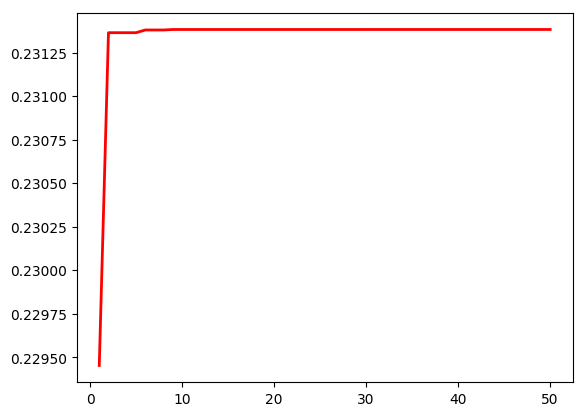

6-element Array{Any,1}:
  [1.0, 0.0]          
  [0.5, 0.5]          
 0.486905624          
 0.23138226556240576  
 5.677291969874432e-12
  PyPlot.plot         

In [4]:
theta = [-2.163, -0.1]
design = [0,1]
k = 2
nptc = 20
niter = 50

diter()

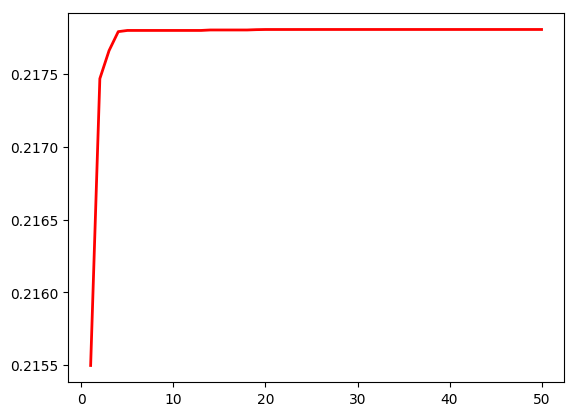

6-element Array{Any,1}:
  [1.0, 0.0]          
  [0.5, 0.5]          
 0.028706922          
 0.21780630436463627  
 9.870770867337342e-12
  PyPlot.plot         

In [5]:
theta = [-2.163, -0.405]
design = [0,1]
k = 2
nptc = 20
niter = 50

diter()

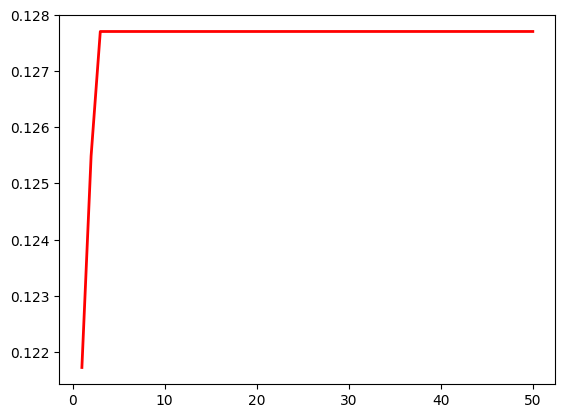

6-element Array{Any,1}:
  [0.0, 1.0]          
  [0.5, 0.5]          
 0.037815381          
 0.1277079541438674   
 9.191508665296055e-12
  PyPlot.plot         

In [6]:
theta = [-2.163, -1.526]
design = [0,1]
k = 2
nptc = 20
niter = 50

diter()

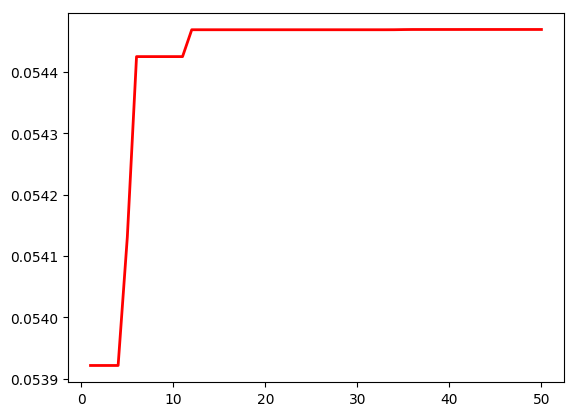

6-element Array{Any,1}:
  [0.0, 0.900865]     
  [0.500001, 0.499999]
 0.029840018          
 0.054469214464501994 
 2.2214641862139395e-9
  PyPlot.plot         

In [7]:
theta = [-2.163, -2.623]
design = [0,1]
k = 2
nptc = 20
niter = 50

diter()

501001502002503003504004505005506006507007508008509009501000

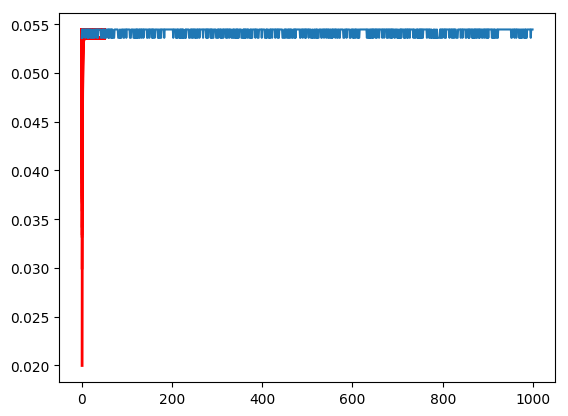

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5d8aa7ac88>

In [8]:
result = zeros(1000)
for i in 1:1000
    result[i] = diter()[4]
    if i % 50 ==0
        print(i)
    end
end

plot(result)

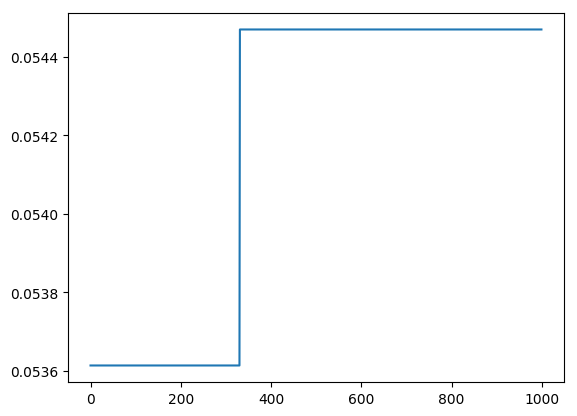

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5d8a8764e0>

In [9]:
plot(sort(result))